# Code2: Model Evaluation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

import pandas as pd
from sklearn.preprocessing import StandardScaler # stanardization
from sklearn.preprocessing import LabelEncoder # Label --> Number
from sklearn.preprocessing import minmax_scale

from sklearn.model_selection import train_test_split # Training/Test split

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import confusion_matrix, classification_report # Confusion Matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve

In [2]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Education,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,0,1,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,0,1,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,0,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,0,2,0,0,0,1,0


In [3]:
y = bank_df['Personal Loan']

# Binomial

In [8]:
X = bank_df.drop (['ID','ZIP Code','Personal Loan'], axis=1)
X['Age'] = X['Age'].round(-1)
X['CCAvg'] = round(X['CCAvg'])
X['Income'] = X['Income'].round(-1)
X = pd.get_dummies(X, columns=['Experience','Age', 'Income', 'Family', 'CCAvg', 'Education',], drop_first = True)
X.dtypes

Mortgage              int64
Securities Account    int64
CD Account            int64
Online                int64
CreditCard            int64
                      ...  
CCAvg_8.0              bool
CCAvg_9.0              bool
CCAvg_10.0             bool
Education_2            bool
Education_3            bool
Length: 91, dtype: object

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,stratify=y)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1130
           1       0.61      0.61      0.61       120

    accuracy                           0.92      1250
   macro avg       0.78      0.78      0.78      1250
weighted avg       0.92      0.92      0.92      1250

accuracy: 0.925
precision: 0.608
recall: 0.608
F1: 0.608


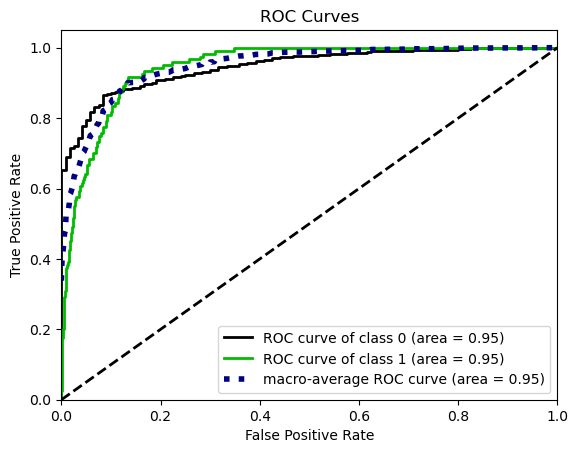

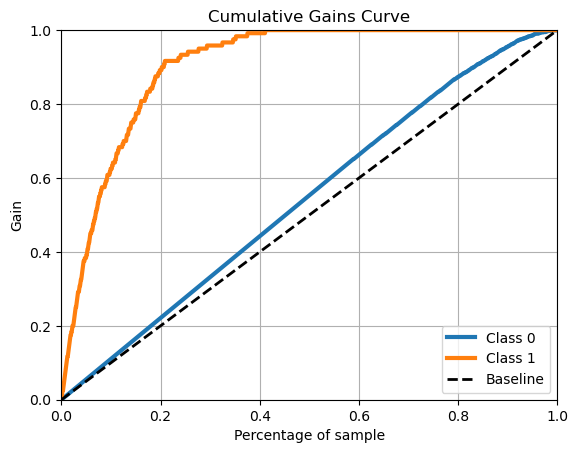

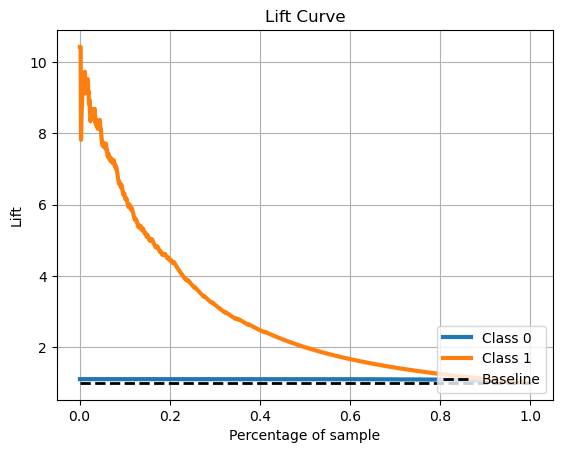

In [6]:
bnb = BernoulliNB(alpha=1.0)
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
y_pred_p = bnb.predict_proba(X_test)
print(classification_report(y_test, y_pred))
print('accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
skplt.metrics.plot_roc(y_test, bnb.predict_proba(X_test),plot_micro=False)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, bnb.predict_proba(X_test))
plt.show()
skplt.metrics.plot_lift_curve(y_test, bnb.predict_proba(X_test))
plt.show()

# Multinomial

In [7]:
X = bank_df.drop (['ID','ZIP Code','Personal Loan'], axis=1)
X['Age'] = X['Age'].round(-1)
X['CCAvg'] = round(X['CCAvg'])
X['Income'] = X['Income'].round(-1)
X['Experience'] = minmax_scale(X['Experience'])
X.dtypes

Age                     int64
Experience            float64
Income                  int64
Family                  int64
CCAvg                 float64
Mortgage                int64
Education               int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,stratify=y)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1130
           1       0.28      0.66      0.39       120

    accuracy                           0.80      1250
   macro avg       0.62      0.74      0.63      1250
weighted avg       0.89      0.80      0.83      1250

accuracy: 0.801
precision: 0.275
recall: 0.658
F1: 0.388


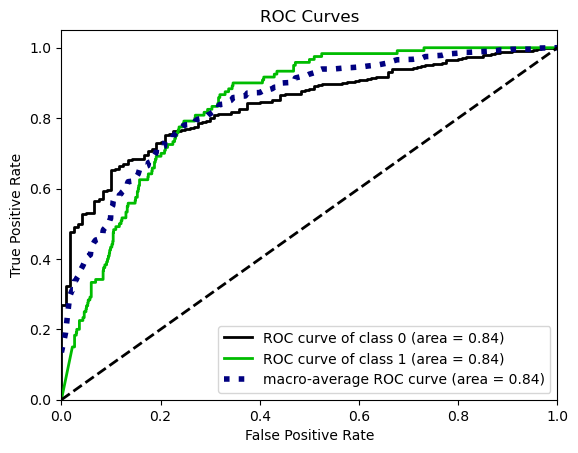

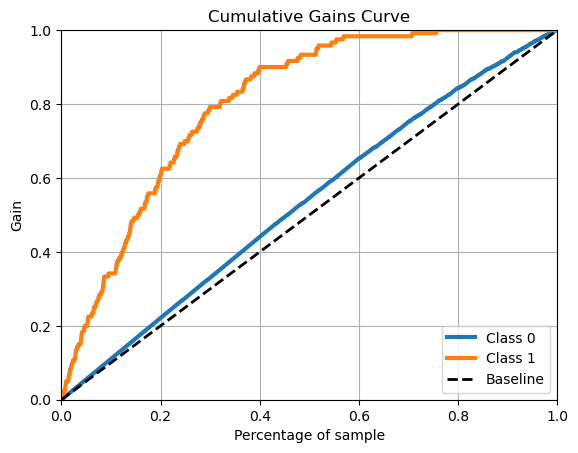

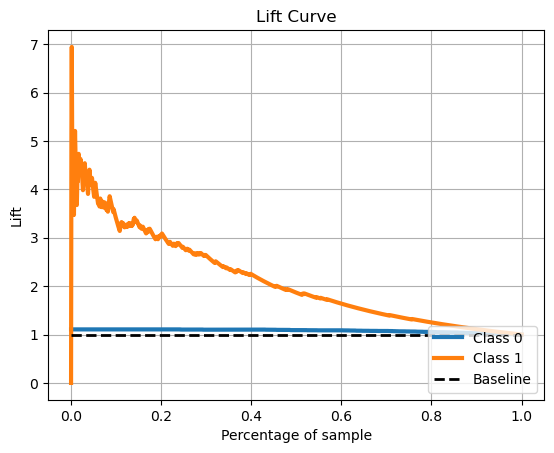

In [85]:
mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
y_pred_p = mnb.predict_proba(X_test)
print(classification_report(y_test, y_pred))
print('accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
skplt.metrics.plot_roc(y_test, mnb.predict_proba(X_test),plot_micro=False)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, mnb.predict_proba(X_test))
plt.show()
skplt.metrics.plot_lift_curve(y_test, mnb.predict_proba(X_test))
plt.show()

# Gaussian

In [86]:
X = bank_df.drop (['ID','ZIP Code','Personal Loan'], axis=1)
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Education,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,0,1,1,0,0,0
1,45,19,34,3,1.5,0,1,1,0,0,0
2,39,15,11,1,1.0,0,1,0,0,0,0
3,35,9,100,1,2.7,0,2,0,0,0,0
4,35,8,45,4,1.0,0,2,0,0,0,1


In [87]:
gnb = GaussianNB(alpha=1)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred_p = gnb.predict_proba(X_test)
print(classification_report(y_test, y_pred))
print('accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
skplt.metrics.plot_roc(y_test, gnb.predict_proba(X_test),plot_micro=False)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, gnb.predict_proba(X_test))
plt.show()
skplt.metrics.plot_lift_curve(y_test, gnb.predict_proba(X_test))
plt.show()

TypeError: GaussianNB.__init__() got an unexpected keyword argument 'alpha'